You are required to fuse three classifiers using the majority voting rule: (1) Decision Tree, (2) Gaussian Naïve Bayes, and (3) Logistic Regression. Then compare the accuracy of the fused model with: (4) AdaBoost Ensemble with Decision Trees as the base learner, and (5) Random Forests. Use Python SciKit (https://scikit-learn.org) or R (https://www.r-project.org) to perform classification on the data discussed below.

-----
Data: Use the data file (spam.data) posted under ‘Project Assignment 1’ folder, Files, Canvas. The dataset classifies email messages as spam or ham (two classes).  There are 57 attributes that encode the number of times that certain words or characters occur. The dataset contains a total of 4601 instances.

In [ ]:
import pandas as pd
pd.__version__

'1.3.5'

In [ ]:
#Mouting the drive to load a simple dataset stored on the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading a dataset into a dataframe
#Use describe(), info(), head() functions to get simple statistics and a description of the dataset 
spam_dataset_dataframe = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DTSC 620 (Statistics for Data Science)/data/spam.csv", sep = ',')
#drop rows where at least one element is missing
spam_dataset_dataframe.dropna(inplace=True)
print('Dataset Loaded...')
spam_dataset_dataframe.describe()

Dataset Loaded...


,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feef21bd250>,
      dtype=object)

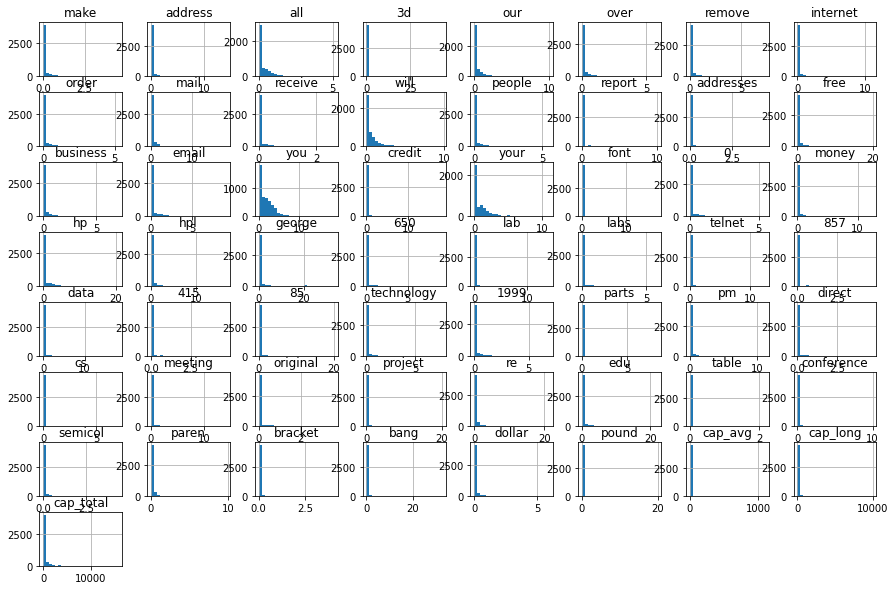

In [ ]:
#Plot per feature histogram. figsize = (width, height)
spam_dataset_dataframe.hist(bins=25,figsize=(15,10))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X = spam_dataset_dataframe[['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total']]
y = spam_dataset_dataframe["Class"]

In [ ]:
(spam_training_data, spam_test_data, spam_training_target, spam_test_target) = train_test_split(X,y, test_size=3601,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf_dt = DecisionTreeClassifier(criterion = "entropy")
clf_lr = LogisticRegression(max_iter=2000) #was obtaining a ConvergenceWarning so I increased the # of max interations to fix it, default is 100
clf_gnb = GaussianNB()
clf_rf = RandomForestClassifier(n_estimators=1000)
clf_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier()) 
eclf = VotingClassifier(estimators = [('DT', clf_dt),('LR',clf_lr),('GNB',clf_gnb)], voting ='hard')

In [ ]:
%%timeit
eclf.fit(spam_training_data,spam_training_target)

1.05 s ± 628 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
clf_ada.fit(spam_training_data,spam_training_target)

24.3 ms ± 769 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
clf_rf.fit(spam_training_data,spam_training_target)

2.51 s ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
print("Using fused model")
spam_test_target_predict =eclf.predict(spam_test_data)
print(confusion_matrix(spam_test_target,spam_test_target_predict))
print(classification_report(spam_test_target,spam_test_target_predict))
print("Fused Model Accuracy: ",accuracy_score(spam_test_target,spam_test_target_predict))
per_class = confusion_matrix(spam_test_target,spam_test_target_predict).diagonal()/confusion_matrix(spam_test_target,spam_test_target_predict).sum(axis=1)
print("Per class accuracy for ham: ", per_class[0])
print("Per class accuracy for spam: ", per_class[1])

Using fused model
[[1980  205]
 [  87 1329]]
              precision    recall  f1-score   support

         ham       0.96      0.91      0.93      2185
        spam       0.87      0.94      0.90      1416

    accuracy                           0.92      3601
   macro avg       0.91      0.92      0.92      3601
weighted avg       0.92      0.92      0.92      3601

Fused Model Accuracy:  0.918911413496251
Per class accuracy for ham:  0.9061784897025171
Per class accuracy for spam:  0.9385593220338984


In [ ]:
print("Using AdaBoost model")
spam_test_target_predict =clf_ada.predict(spam_test_data)
print(confusion_matrix(spam_test_target,spam_test_target_predict))
print(classification_report(spam_test_target,spam_test_target_predict))
print("AdaBoost Accuracy: ",accuracy_score(spam_test_target,spam_test_target_predict))
per_class = confusion_matrix(spam_test_target,spam_test_target_predict).diagonal()/confusion_matrix(spam_test_target,spam_test_target_predict).sum(axis=1)
print("Per class accuracy for ham: ", per_class[0])
print("Per class accuracy for spam: ", per_class[1])

Using AdaBoost model
[[1917  268]
 [ 175 1241]]
              precision    recall  f1-score   support

         ham       0.92      0.88      0.90      2185
        spam       0.82      0.88      0.85      1416

    accuracy                           0.88      3601
   macro avg       0.87      0.88      0.87      3601
weighted avg       0.88      0.88      0.88      3601

AdaBoost Accuracy:  0.8769786170508193
Per class accuracy for ham:  0.8773455377574371
Per class accuracy for spam:  0.876412429378531


In [ ]:
print("Using RandomForest model")
spam_test_target_predict =clf_rf.predict(spam_test_data)
print(confusion_matrix(spam_test_target,spam_test_target_predict))
print(classification_report(spam_test_target,spam_test_target_predict))
print("Random Forest Accuracy: ", accuracy_score(spam_test_target,spam_test_target_predict))
per_class = confusion_matrix(spam_test_target,spam_test_target_predict).diagonal()/confusion_matrix(spam_test_target,spam_test_target_predict).sum(axis=1)
print("Per class accuracy for ham: ", per_class[0])
print("Per class accuracy for spam: ", per_class[1])

Using RandomForest model
[[2074  111]
 [ 126 1290]]
              precision    recall  f1-score   support

         ham       0.94      0.95      0.95      2185
        spam       0.92      0.91      0.92      1416

    accuracy                           0.93      3601
   macro avg       0.93      0.93      0.93      3601
weighted avg       0.93      0.93      0.93      3601

Random Forest Accuracy:  0.9341849486253818
Per class accuracy for ham:  0.9491990846681923
Per class accuracy for spam:  0.9110169491525424


### Testing accuracies using different training-testing splits


In [ ]:
splits = [0.5,0.4,0.3,0.2]
for split in splits:
  (X_train, X_test, y_train, y_test) = train_test_split(X,y, test_size=split,random_state=42)
  eclf.fit(X_train,y_train)
  clf_ada.fit(X_train,y_train)
  train_split = 1.0 - split
  test_split = split * 100
  train_split = 100.0 - test_split
  print("--------------------------------------------------\nTrain and Test split:    %{0} - %{1}\n".format(train_split,test_split))
  print("Using fused model")
  spam_test_target_predict =eclf.predict(X_test)
  print(confusion_matrix(y_test,spam_test_target_predict))
  print(classification_report(y_test,spam_test_target_predict))
  print("Model Accuracy: ", accuracy_score(y_test,spam_test_target_predict))
  per_class = confusion_matrix(y_test,spam_test_target_predict).diagonal()/confusion_matrix(y_test,spam_test_target_predict).sum(axis=1)
  print("Per class accuracy for ham: ", per_class[0])
  print("Per class accuracy for spam: ", per_class[1])
  print()
  print("Using AdaBoost model")
  spam_test_target_predict = clf_ada.predict(X_test)
  print(confusion_matrix(y_test,spam_test_target_predict))
  print(classification_report(y_test,spam_test_target_predict))
  print("Model Accuracy: ", accuracy_score(y_test,spam_test_target_predict))
  per_class = confusion_matrix(y_test,spam_test_target_predict).diagonal()/confusion_matrix(y_test,spam_test_target_predict).sum(axis=1)
  print("Per class accuracy for ham: ", per_class[0])
  print("Per class accuracy for spam: ", per_class[1])
  print()

--------------------------------------------------
Train and Test split:    %50.0 - %50.0

Using fused model
[[1283  118]
 [  48  852]]
              precision    recall  f1-score   support

         ham       0.96      0.92      0.94      1401
        spam       0.88      0.95      0.91       900

    accuracy                           0.93      2301
   macro avg       0.92      0.93      0.93      2301
weighted avg       0.93      0.93      0.93      2301

Model Accuracy:  0.9278574532811821
Per class accuracy for ham:  0.9157744468236974
Per class accuracy for spam:  0.9466666666666667

Using AdaBoost model
[[1267  134]
 [ 102  798]]
              precision    recall  f1-score   support

         ham       0.93      0.90      0.91      1401
        spam       0.86      0.89      0.87       900

    accuracy                           0.90      2301
   macro avg       0.89      0.90      0.89      2301
weighted avg       0.90      0.90      0.90      2301

Model Accuracy:  0.897435897